In [58]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [59]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [60]:
data = pd.read_csv("../../Data/MIGHTEE/Classification/final_gaussian_radio_more.csv")

In [61]:
# Dropping nan classifications
data = data[data['Classification'].notna()]

# Dropping quasar-like radio AGN / high-excitation radio galaxy
#mightee_data = mightee_data[mightee_data['Classification'] != 'star-forming galaxy']
print("Amount of rows:", len(data))

Amount of rows: 4370


In [62]:
X = data.drop(columns=['Classification', 'XAGN', 'midIRAGN', 'VLBAAGN', 'RLAGN', 'optAGN', 'Unnamed: 0', 'S_INT14', 'S_PEAK14'])
y = data[['Classification', 'XAGN', 'midIRAGN', 'VLBAAGN', 'RLAGN', 'optAGN']]

In [63]:
X.isna().sum(axis=0)

Z_BEST              0
ch1_flux_corr      57
ch2_flux_corr      65
ch3_flux_corr     123
ch4_flux_corr      66
F_MIPS_24           0
F_PACS_100          0
F_PACS_160        437
F_SPIRE_250      1119
F_SPIRE_350      1609
F_SPIRE_500      3100
EBV                 0
Ks_flux_corr       86
H_flux_corr        59
J_flux_corr        47
i_flux_corr        10
r_flux_corr        16
u_flux_corr       158
z_flux_corr         6
y_flux_corr        84
NUV_flux_corr    2217
FUV_flux_corr    3062
Total_flux          0
Peak_flux          94
dtype: int64

# Dropping columns with little data (optional)

In [64]:
X = X.drop(columns=['F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'NUV_flux_corr', 'FUV_flux_corr'])

## Filter by thin redshift slice (optional)

<AxesSubplot:>

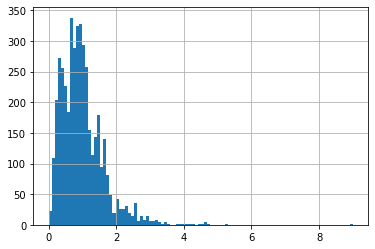

In [65]:
X.Z_BEST.hist(bins=100)

In [66]:
delta_z = 0.4

for z in np.arange(0.1,4,0.1):
    z = round(z,1)
    print(z, sum((X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))))

0.1 950
0.2 1041
0.3 1183
0.4 1110
0.5 1244
0.6 1384
0.7 1353
0.8 1295
0.9 1074
1.0 845
1.1 743
1.2 607
1.3 616
1.4 561
1.5 404
1.6 315
1.7 212
1.8 143
1.9 133
2.0 126
2.1 104
2.2 116
2.3 85
2.4 81
2.5 67
2.6 44
2.7 47
2.8 38
2.9 39
3.0 27
3.1 22
3.2 17
3.3 9
3.4 7
3.5 4
3.6 4
3.7 5
3.8 6
3.9 5


In [67]:
z = 0.6
#z = 3
delta_z = 0.4

redshift_filt = (X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))
X_sliced = X[redshift_filt]

In [68]:
len(X_sliced)

1384

# Dropping redshift column (optional)

In [69]:
X_sliced = X_sliced.drop(columns='Z_BEST')

## Filling nan's

In [70]:
# fill nans with 0s
#X_filled = X.fillna(0)

# FIlling with mean, filling with 0s caused a weird split into 2 groups
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_filled = imp_mean.fit_transform(X)

# Remove min_value if logging
imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X_sliced)

## Scaling (necessary for proper usage of T-sne)

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

scaler = StandardScaler()
X_final = scaler.fit_transform(X_filled)

## Running t-sne

In [72]:
# 30 with z=0.2-0.7 is nice, also with droppig columns
tsne = TSNE(perplexity=50, 
            n_components=2,
            init='random', 
            n_iter=10**5, 
            verbose=5, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto',
            #random_state=42
           )

In [73]:
X_transformed = tsne.fit_transform(X_final)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1384 samples in 0.001s...
[t-SNE] Computed neighbors for 1384 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1384
[t-SNE] Computed conditional probabilities for sample 1384 / 1384
[t-SNE] Mean sigma: 0.644208
[t-SNE] Computed conditional probabilities in 0.143s
[t-SNE] Iteration 50: error = 67.1243134, gradient norm = 0.0244223 (50 iterations in 0.838s)
[t-SNE] Iteration 100: error = 62.4619560, gradient norm = 0.0000526 (50 iterations in 0.630s)
[t-SNE] Iteration 100: gradient norm 0.000053. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 62.461956
[t-SNE] Iteration 150: error = 1.1656835, gradient norm = 0.0021968 (50 iterations in 0.506s)
[t-SNE] Iteration 200: error = 0.9862018, gradient norm = 0.0007151 (50 iterations in 0.422s)
[t-SNE] Iteration 250: error = 0.9253495, gradient norm = 0.0003380 (50 iterations in 0.415s)
[t-SNE] Iteration 300: error = 0.89896

In [74]:
tempdata = np.hstack((X_filled, X_transformed, y['Classification'][redshift_filt].to_numpy()[:, np.newaxis]))
columns = list(X.columns)
columns.extend(['x', 'y', 'z', 'class'])

temp = pd.DataFrame(data=tempdata, columns=columns)
temp.to_csv('temp.csv', index=False)

ValueError: Shape of passed values is (1384, 21), indices imply (1384, 23)

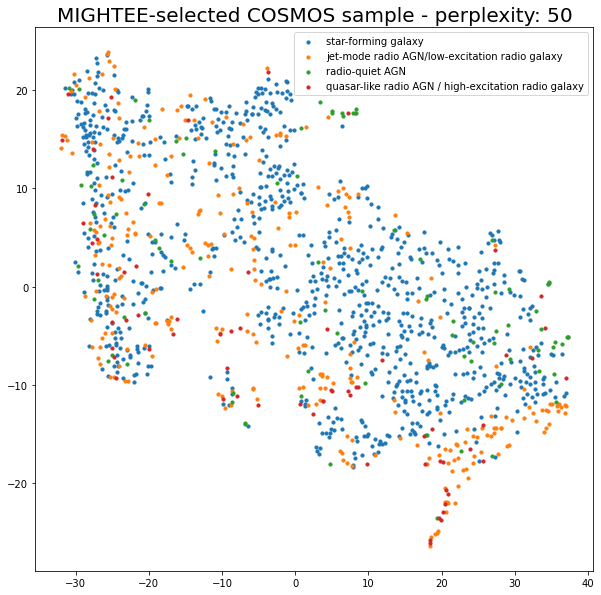

In [75]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Classification'][redshift_filt]==i
    plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=10,label=i)
plt.legend()
plt.title('MIGHTEE-selected COSMOS sample - perplexity: 50', fontsize=20)
plt.savefig('MIGHTEE_t-sne.pdf', bbox_inches='tight')
plt.show()

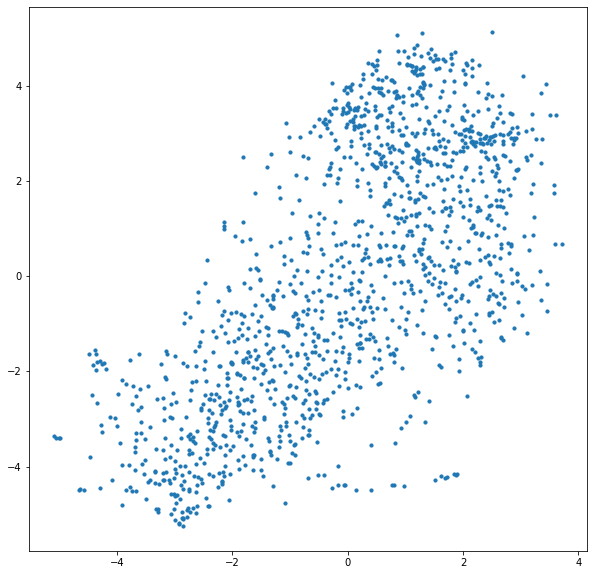

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=10)

In [100]:
tempdata = np.hstack((X_filled, X_transformed, y['Classification'][redshift_filt].to_numpy()[:, np.newaxis]))
columns = list(X.columns)
columns.extend(['x', 'y', 'class'])

temp = pd.DataFrame(data=tempdata, columns=columns)
temp.to_csv('temp.csv', index=False)

## In a loop

In [45]:
for i in range(5,1005,5):
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_final)
    
    print(i, tsne.kl_divergence_)
    

5 1.091081142425537
10 1.1866810321807861
15 1.18507981300354
20 1.171356439590454
25 1.1409461498260498
30 1.1111550331115723
35 1.083837866783142
40 1.0446194410324097
45 1.0301252603530884
50 0.9889545440673828
55 0.9842267036437988
60 0.9429670572280884
65 0.9132330417633057
70 0.8870327472686768
75 0.8842928409576416
80 0.8699929118156433
85 0.8388965725898743
90 0.8242543935775757
95 0.8090264797210693


KeyboardInterrupt: 